# Import


In [1]:
!pip install tf-keras-vis

     |████████████████████████████████| 53 kB 1.9 MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))

from tensorflow.keras import models
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D, Scale
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D

Tensorflow recognized 1 GPUs


In [3]:
model = models.load_model('/content/drive/MyDrive/Le Wagon - Projet/Models/Custom/20210831-232206-images_41312-batch_32-vgg_like')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 222, 222, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 220, 220, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)     

# Select layer

## Select conv2d

In [15]:
# The target layer
layer_name = 'conv2d'

# Best Parameters for the layer conv2d
steps=200
regularizers=[TotalVariation2D(weight=0.001),Norm(weight=0.0001, p=2)]
input_modifiers = [Jitter(jitter=16)]

## Select conv2d_5

In [8]:
# The target layer
layer_name = 'conv2d_5' 

# Best Parameters for the layer conv2d_5
steps=200
regularizers=[TotalVariation2D(weight=0.001),Norm(weight=0.01, p=2)]
input_modifiers = [Jitter(jitter=16)]

## Select conv2d_10

In [20]:
# The target layer
layer_name = 'conv2d_10' 

# Best Parameters for the layer conv2d_10
steps=256
regularizers=[TotalVariation2D(weight=0.002),Norm(weight=0.008, p=2)]
input_modifiers = [Jitter(jitter=32)]

# Visualizing Conv filters



In [18]:
# Number of filters to display (rows * cols)
rows = 2
cols = 4

# This instance constructs new model whose output is replaced to the selected layer's output.
extract_intermediate_layer = ExtractIntermediateLayer(index_or_name=layer_name)

# This instance modify the model's last activation function to linear one.
replace2linear = ReplaceToLinear()

filter_numbers = sorted(list(np.random.choice(range(model.get_layer(name=layer_name).output.shape[-1]),rows*cols,replace=False)))
print(filter_numbers)

scores = CategoricalScore(filter_numbers)

# Define seed inputs whose shape is (samples, height, width, channels).
seed_input = tf.random.uniform((len(filter_numbers), 224, 224, 3), 0, 255)

activation_maximization = ActivationMaximization(model, model_modifier=[extract_intermediate_layer, replace2linear], clone=False)

[84, 125, 152, 161, 278, 384, 460, 467]


256/256 [==============================] - 40s 157ms/step - Score: 4.8945 - TotalVariation2D: 0.2146 - Norm: 0.9670


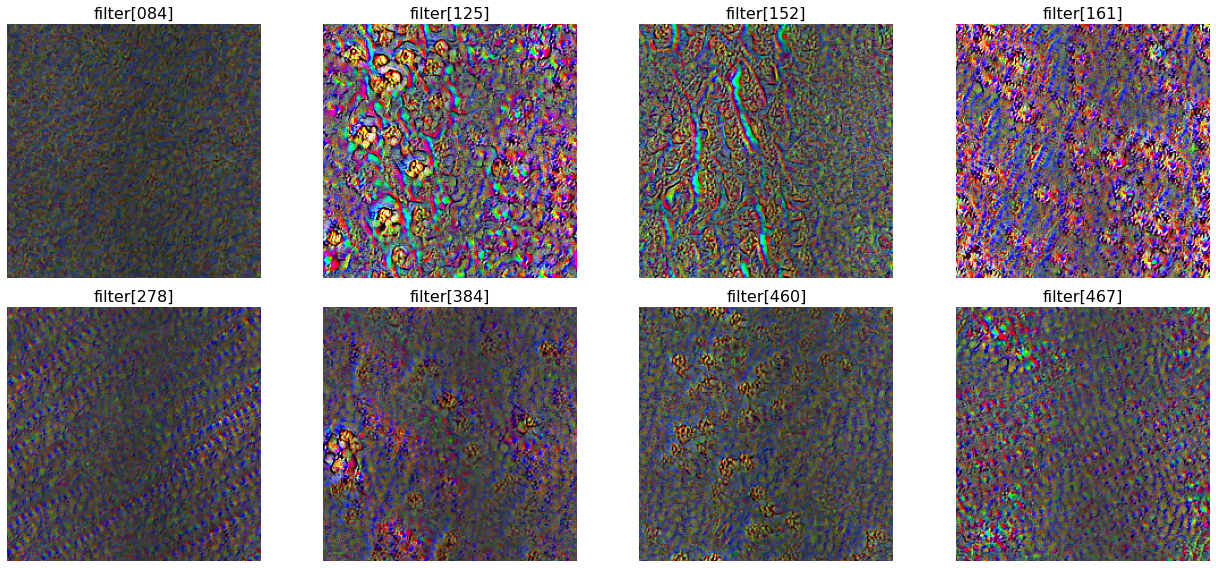

In [19]:
# Generate maximized activation
activations = activation_maximization(scores,
                                      seed_input=seed_input,
                                      callbacks=[Progress()],steps=steps,training=False,
                                      regularizers=regularizers,
                                      input_modifiers =input_modifiers)

axes=[]
fig=plt.figure(figsize=(18, 8))

for i,j in enumerate(filter_numbers):
    axes.append( fig.add_subplot(rows, cols, i+1) )
    subplot_title=("Filter "+str(j))
    axes[-1].set_title('filter[{:03d}]'.format(j), fontsize=16)  
    axes[-1].imshow(activations[i]) 
    axes[-1].axis('off') 
fig.tight_layout()    
plt.show()

In [ ]:
# Save
for i, j in enumerate(filter_numbers):
    fig=plt.figure(figsize=(16, 16)) 
    plt.imshow(activations[i])
    plt.axis('off')
    fig.tight_layout() 
    fig.savefig(f"{layer_name}_filter_{j}.png",dpi=300)